# Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Softmax Function

   $$ h = P(y = c \mid \boldsymbol{\theta}) = \frac{e^{\boldsymbol{\theta}^{T}_c\mathbf{x}}}{\Sigma_{i=1}^{k} e^{\boldsymbol{\theta}_k^{T}\mathbf{x}}}$$
   where c is the class

In [2]:
X = np.array([[1, 2, 3], [2, 4, 5]])  #(m, n) = (2, 3)
print(X.shape)

(2, 3)


In [3]:
Y = np.array([[0, 0, 1, 0], [1, 0, 0, 0]]) #np.array([[2], [0]]); k = 4;  (m, k) = (2, 4)
print(Y.shape)

(2, 4)


In [4]:
W = np.array([    [1, 2, 3, 4],    [2, 3, 1, 0],    [1, 2, 5, 1]    ])  #(n, k)
print(W.shape)

(3, 4)


In [5]:
print(X @ W) #(m, n) @ (n, k) = (m, k)
print((X @ W).shape)

[[ 8 14 20  7]
 [15 26 35 13]]
(2, 4)


In [6]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims=True)

# np.exp(8) / 4.86371877e+08

In [7]:
np.sum(np.exp(X @ W), axis = 1, keepdims=True)

array([[4.86371877e+08],
       [1.58620919e+15]])

In [8]:
np.exp(8) / 4.86371877e+08

6.128968651371527e-06

In [9]:
print(softmax(X @ W))
print((softmax(X @ W)).shape)

[[6.12896865e-06 2.47260243e-03 9.97519014e-01 2.25472156e-06]
 [2.06089928e-09 1.23394576e-04 9.99876603e-01 2.78912388e-10]]
(2, 4)


In [10]:
softmax(X@W).sum(axis=1)

array([1., 1.])

In [11]:
#inference
np.argmax(softmax(X@W), axis=1)

array([2, 2], dtype=int64)

## Cross entropy loss

$$J = -\sum_{i=1}^m y^{(i)}\log(h^{(i)})$$

In [12]:
Y

array([[0, 0, 1, 0],
       [1, 0, 0, 0]])

In [13]:
h = softmax(X @ W)
h

array([[6.12896865e-06, 2.47260243e-03, 9.97519014e-01, 2.25472156e-06],
       [2.06089928e-09, 1.23394576e-04, 9.99876603e-01, 2.78912388e-10]])

In [14]:
ce = np.sum(-(Y * np.log(h)))

In [15]:
ce

20.00260747339262

## Gradient

$$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{H} - \mathbf{Y})$$

## Let's start!

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

## 1. Change our target to one-hot

In [17]:
k = len(set(y))
m = X_train.shape[0]
n = X_train.shape[1]
k, m, n

(3, 105, 3)

In [18]:
Y_train_encoded = np.zeros((m, k))

In [19]:
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [20]:
Y_train_encoded.shape  #(m, k)

(105, 3)

## 2. Algorithm

In [21]:
class LogisticRegression:
    
    def __init__(self, k, n, lr=0.01, max_iter=1000):
        self.k  = k
        self.n  = n
        self.lr = lr
        self.max_iter = max_iter
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        #mini-batch
        start_time = time.time()
        
        batch_size = int(0.3 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0])  #<====with replacement
            batch_X = X[ix:ix+batch_size]
            batch_Y = Y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_Y)
            self.losses.append(loss)
            self.W = self.W - self.lr * grad
            if (i % 100) == 0:
                print(f"Loss at iteration {i}: {loss}")    
        print(f"Time taken: {time.time() - start_time}")
    
    def gradient(self, X, Y):
        m = X.shape[0]
        H = self._predict(X, self.W)
        loss = -np.sum(Y*np.log(H)) / m
        grad = X.T @ (H - Y)
        return loss, grad
    
    def softmax(self, h_theta):
        return np.exp(h_theta) / np.sum(np.exp(h_theta), axis=1, keepdims=True)
    
    def _predict(self, X, W):
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self._predict(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("Iteration")
        plt.ylabel("Losses")
        plt.legend()

## 3. Running the algorithm

In [22]:
#define the model
#k, n, lr=0.01, max_iter=1000)
model = LogisticRegression(k, n)

#fit
model.fit(X_train, Y_train_encoded)

Loss at iteration 0: 1.620166717575478
Loss at iteration 100: 0.22784734910748156
Loss at iteration 200: 0.28666937637892037
Loss at iteration 300: 0.12893499234453226
Loss at iteration 400: 0.13417393120629406
Loss at iteration 500: 0.07674659032933392
Loss at iteration 600: 0.08481526804660991
Loss at iteration 700: 0.15207898219180158
Loss at iteration 800: 0.1613053314627029
Loss at iteration 900: 0.11285431758291803
Time taken: 0.10484814643859863


In [23]:
#predict the X_test
yhat = model.predict(X_test)

In [24]:
yhat

array([1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2,
       0], dtype=int64)

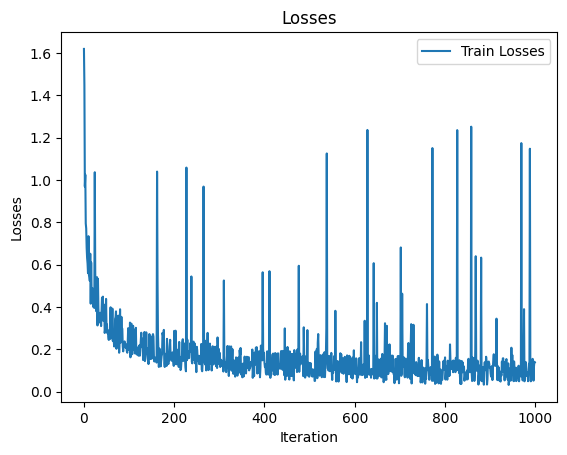

In [25]:
model.plot()

In [26]:
print("Report:", classification_report(y_test, yhat))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## 4. Inference